<a href="https://colab.research.google.com/github/ashlearo/ML/blob/main/%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%B0_6_%22%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B8%CC%86_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B8%CC%86_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85__ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии (**N декабря в M часов**).  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1IJRb8SGiHm2BnjQ-MJXXFrzzjCUf1FhCCG6QDHDPin0/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком.

Вопросы, на которые нужно ответить в презентации:
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :)

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией.

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt).


## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1jN8W_OQWm2Wryvn6rrSm58no679X_be_/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data (2).csv


In [ ]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты.

In [ ]:
data.drop_duplicates (keep = 'first', inplace = True)
data = data.rename(columns={"ratingLevel": "rating_level", "release year": "release_year", "user rating score":'user_rating_score'})
data.shape

(500, 5)

Сколько рейтинговых групп представлено в данных?

In [ ]:
data.rating.unique().shape[0]

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

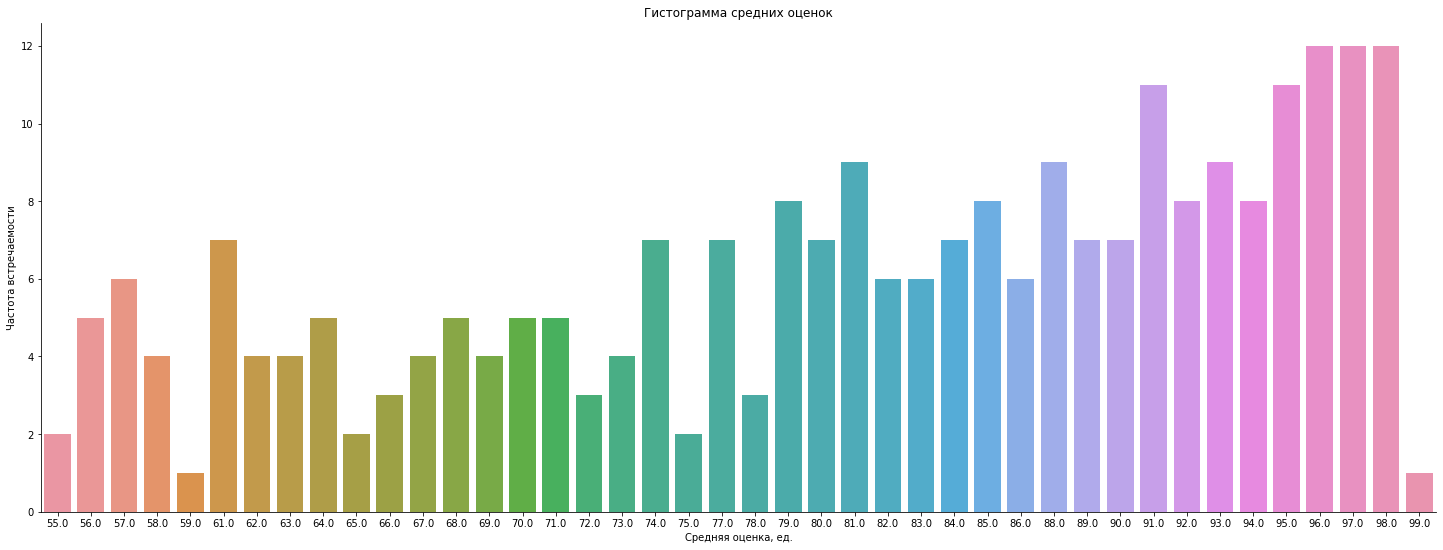

In [ ]:
plt.figure(figsize=(25,9))
sns.countplot(data = data, x="user_rating_score", label='частота встречаемости оценки')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Средняя оценка, ед.')
plt.ylabel('Частота встречаемости')
plt.title ('Гистограмма средних оценок')
plt.show()

***Вывод:*** пользователи высоко оценивают сериалы Нетфликс, средний рейтинг сериала 81 балл из ста, при этом медиана расположена достаточно близко к среднему (83.5 и 81.4) - это говорит о том, что многие сериалы оценены высоко, нет каких-то особенных "выбросов". (Каунтплот больше подходит, т.к. у нас дискретные значения).

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data.user_rating_score.describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user_rating_score, dtype: float64

***Ответ:*** Медиана незначительно отличется от среднего (83.5 и 81.4). При наличии выбросов данные характеристики могут значительно отличаться, как, например, средняя и медианная зарплата в РФ.

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
sorted(data.release_year.unique())

[1940,
 1976,
 1978,
 1982,
 1986,
 1987,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

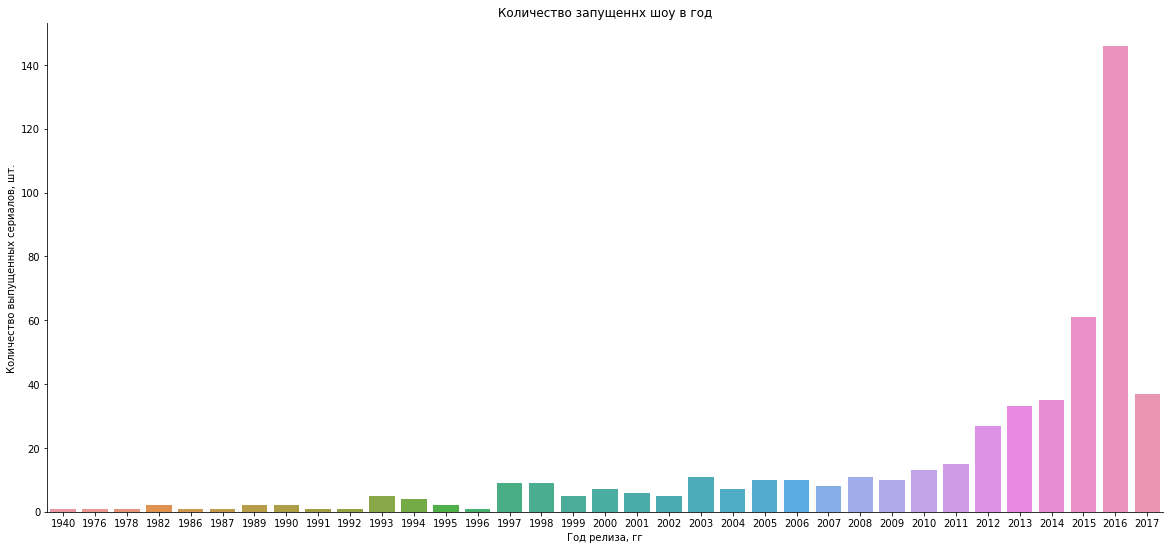

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(x='release_year', data=data)
plt.xlabel('Год релиза, гг')
plt.ylabel('Количество выпущенных сериалов, шт.')
plt.title('Количество запущеннх шоу в год')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


Теперь посмотрим на выброс.

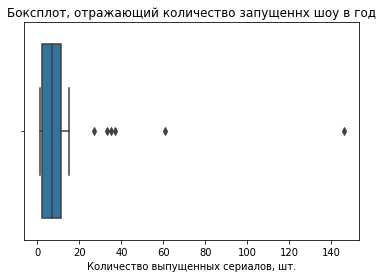

In [ ]:
ax = sns.boxplot(x=data.release_year.value_counts())
plt.title('Боксплот, отражающий количество запущеннх шоу в год')
plt.xlabel('Количество выпущенных сериалов, шт.')
plt.show()

**Вывод:*** Вспомнить определение выброса - больше чего он должен быть.

In [ ]:
outlier_stat = data.groupby(data['release_year'])['title'].count()
outlier_range_1nd_version = outlier_stat.mean() + 3*outlier_stat.std()
outlier_range_2nd_version = outlier_stat.quantile(q=0.75) + 1.5*(outlier_stat.quantile(q=0.75) - outlier_stat.quantile(q=0.25))

print(f'Значение выброса по правилу трех сигм {outlier_range_1nd_version:0.2f} ед.("major outlier"), межквартильный размах равен {outlier_range_2nd_version:0.2f} ед. ("minor outlier")')

Значение выброса по правилу трех сигм 93.52 ед.("major outlier"), межквартильный размах равен 24.50 ед. ("minor outlier")


Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)


Ответить на этот вопрос вам поможет график, который вы построили выше.



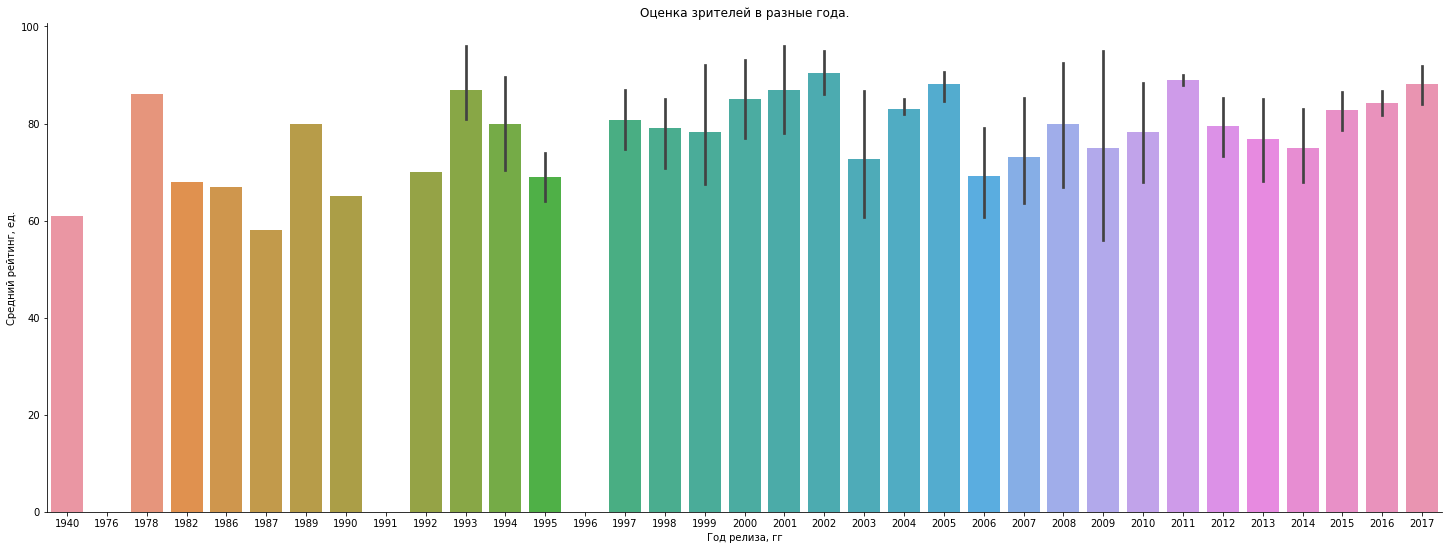

In [ ]:
plt.figure(figsize=(25,9))
sns.barplot(x='release_year', y = 'user_rating_score', data=data)
plt.xlabel('Год релиза, гг')
plt.ylabel('Средний рейтинг, ед.')
plt.title('Оценка зрителей в разные годы.')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
data.query('release_year > 2015').groupby('release_year')['user_rating_score'].mean().reset_index(name="mean_score")

,release_year,mean_score
0,2016,84.313953
1,2017,88.125000


***Вывод:*** 2017 год был более удачный для Нетфликс с точки зрения среднего рейтинга фильмов, но с точки зрения количества запусков - 2016 был более удачный.


Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

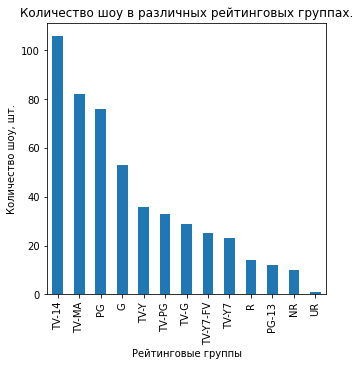

In [ ]:
data.groupby('rating')['title'].count().sort_values(ascending = False).plot.bar(figsize=(5,5))
plt.xlabel('Рейтинговые группы')
plt.ylabel('Количество шоу, шт.')
plt.title('Количество шоу в различных рейтинговых группах.')
plt.show()

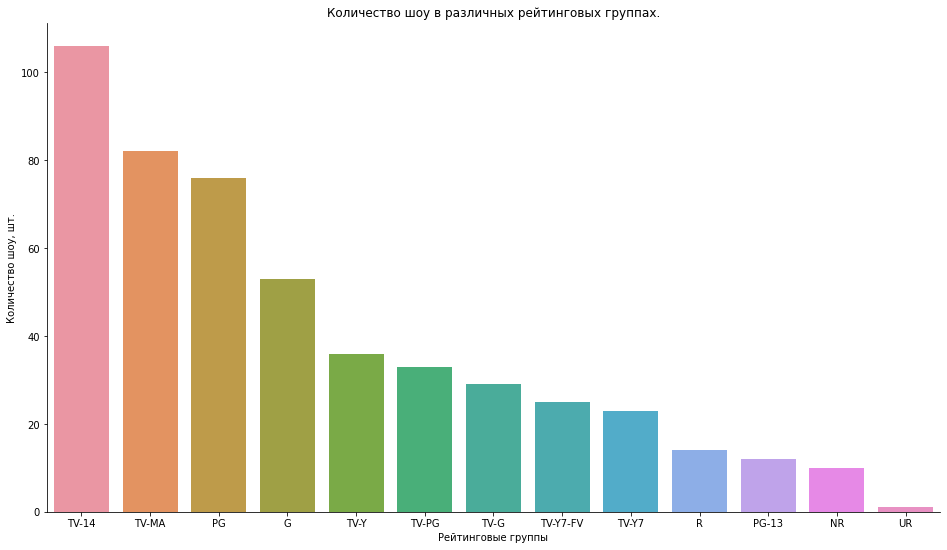

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.xlabel('Рейтинговые группы')
plt.ylabel('Количество шоу, шт.')
plt.title('Количество шоу в различных рейтинговых группах.')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

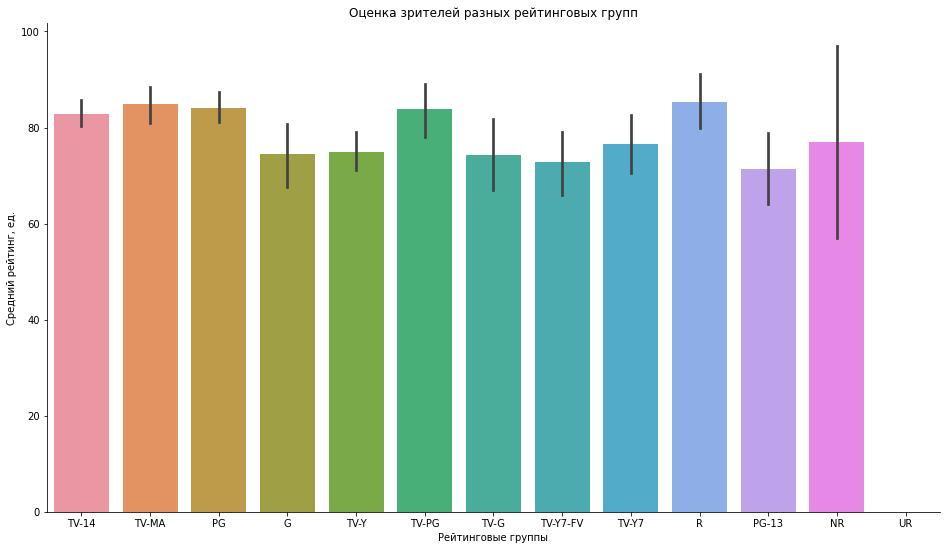

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(x='rating', y = 'user_rating_score', data=data, order=data['rating'].value_counts().index)
plt.xlabel('Рейтинговые группы')
plt.ylabel('Средний рейтинг, ед.')
plt.title('Оценка зрителей разных рейтинговых групп')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

***Вывод:*** Круговые диаграммы сложнее интерпретировать.

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
data.loc[data['user_rating_score'] == data.user_rating_score.min()]

,title,rating,rating_level,release_year,user_rating_score
207,Life Unexpected,TV-PG,Parental guidance suggested. May not be suitab...,2010,55.0
710,Curious George,G,General Audiences. Suitable for all ages.,2006,55.0


In [ ]:
data.loc[data['user_rating_score'] == data.user_rating_score.max()]

,title,rating,rating_level,release_year,user_rating_score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0


***Вывод:*** На основании сравнения худшего и лучшего шоу можно предположить, что Netflix производит фильмы, которые наиболее соответствуют ожиданиям его аудитории.

При создании контента, шоу, произведенные Netflix, получают более высокую оценку, чем шоу, на которые Netflix приобретает права.
